In [41]:
import numpy as np

# 定义系数矩阵 A 和常数向量 b
A = np.array([[1, 2, 1], [2, -1, 3], [3, 1, 2]])
b = np.array([7, 7, 18])

# 求解线性方程组
solution = np.linalg.solve(A, b)
x, y, z = solution

# 输出
print(f"方程组的解为：\n  x = {x:.2f}\n  y = {y:.2f}\n  z = {z:.2f}")
# 验证结果

ver = np.allclose(np.dot(A, solution), b)
print("验证:结果" + "正确" if ver else "不正确")


方程组的解为：
  x = 7.00
  y = 1.00
  z = -2.00
验证:结果正确


In [ ]:
import numpy as np

# 定义系数矩阵 A 和常数向量 b
A = np.array([[4, 3, 5], [2, 6, 4], [5, 2, 7]])
b = np.array([12.8, 14.0, 15.5])

# 求解线性方程组
solution = np.linalg.solve(A, b)
C, S, G = solution

# 输出单价
print(f"材料单价（万元/吨）：\n  水泥 (C) = {C:.2f}\n  钢筋 (S) = {S:.2f}\n  砂石 (G) = {G:.2f}")

# 验证工地 4 的采购计划
plan4 = np.array([3, 4, 6])  # 采购量
actual_cost = np.dot(plan4, solution)  # 计算实际成本
predict_cost = 13.0#预算13万
print(f"\n工地 4 的采购计划：")
print(f"  实际成本 = {actual_cost:.2f} 万元")
print(f"  预算 = {predict_cost:.2f} 万元")

# 判断实际成本是否超过预算成本
judge = actual_cost < predict_cost
output = f"  综上所述，预算{predict_cost:.2f} {'>' if judge else '<'} 实际成本{actual_cost:.2f}\n计划"
output += "合理" if  judge else "不合理"

print(output)

材料单价（万元/吨）：
  水泥 (C) = 0.09
  钢筋 (S) = 1.08
  砂石 (G) = 1.84

工地 4 的采购计划：
  实际成本 = 15.62 万元
  预算 = 13.00 万元
  综上所述，预算13.00 < 实际成本15.62
计划不合理


In [35]:
import pandas as pd

column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv('u.data', sep='\t', names=column_names)

# 构建评分矩阵：行是用户ID，列是电影ID
ratings_matrix = data.pivot_table(index='user_id', columns='movie_id', values='rating')
ratings_matrix = ratings_matrix  # 不填充


# 保存为 CSV 文件
ratings_matrix.to_csv('评分.csv', float_format='%.2f')
print(f"共 {ratings_matrix.shape[0]} 个用户，{ratings_matrix.shape[1]} 部电影。")


共 943 个用户，1682 部电影。


In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

# 读取评分矩阵
ratings_matrix = pd.read_csv('评分.csv', index_col=0)

# 替换为 NaN
ratings_matrix = ratings_matrix.replace(0, np.nan)

#用每列的平均值填补缺失值
imputer = SimpleImputer(strategy='mean')
ratings_filled = imputer.fit_transform(ratings_matrix)

# SVD 分解与重构评分矩阵
k = 20  # 降维维数
svd = TruncatedSVD(n_components=k, random_state=42)
U = svd.fit_transform(ratings_filled)
VT = svd.components_
ratings_pred = np.dot(U, VT)

# 将重建后的预测评分矩阵转换为 DataFrame，并加回用户ID索引
ratings_pred_df = pd.DataFrame(ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)

#为指定用户推荐未评分的电影
def recommend_movies(user_id, original_ratings, predicted_ratings, top_n=5):
    if user_id not in original_ratings.index:
        print(f"用户 {user_id} 不存在！")
        return []
    
    # 找出该用户已评分的电影
    user_rated = original_ratings.loc[user_id][original_ratings.loc[user_id].notna()].index
    # 获取预测评分
    user_predictions = predicted_ratings.loc[user_id].copy()
    # 屏蔽掉已评分电影
    user_predictions.loc[user_rated] = -1
    # 推荐 top_n 个预测评分最高的电影ID
    recommended_movies = user_predictions.sort_values(ascending=False).head(top_n).index
    return recommended_movies.tolist()

# 示例
user_id = 186
top_n = 5
recommendations = recommend_movies(user_id, ratings_matrix, ratings_pred_df, top_n)

print(f"为用户 {user_id} 推荐的电影ID是：{recommendations}")


为用户 186 推荐的电影ID是：['1536', '1500', '1122', '814', '1467']


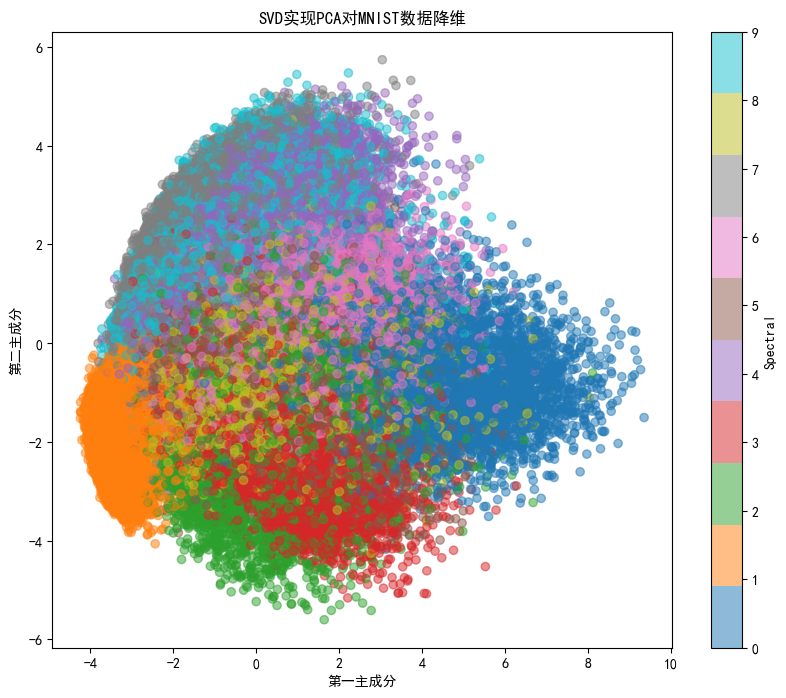

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 加载 MNIST 数据集
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # 归一化
X_centered = X - np.mean(X, axis=0)# 数据中心化

# SVD 分解
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
V2 = Vt[:2, :]# 选择前两个主成分

# 投影到二维空间
X2D = np.dot(X_centered, V2.T)

# 可视化
plt.figure(figsize=(10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c=y.astype(int), cmap='tab10', alpha=0.5)
plt.colorbar(label='Spectral')
plt.title('SVD实现PCA对MNIST数据降维')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.show()